## Name : Prachi Ranjan
## Contact No: +91 8106694870
## Mail ID : pra.rjn@gmail.com
## Oasis Infobyte Data Science Internship
## Github Link: https://github.com/PrachiRanjan3/OIBSIP
## Task 3 : Car Price Prediction with Machine Learning

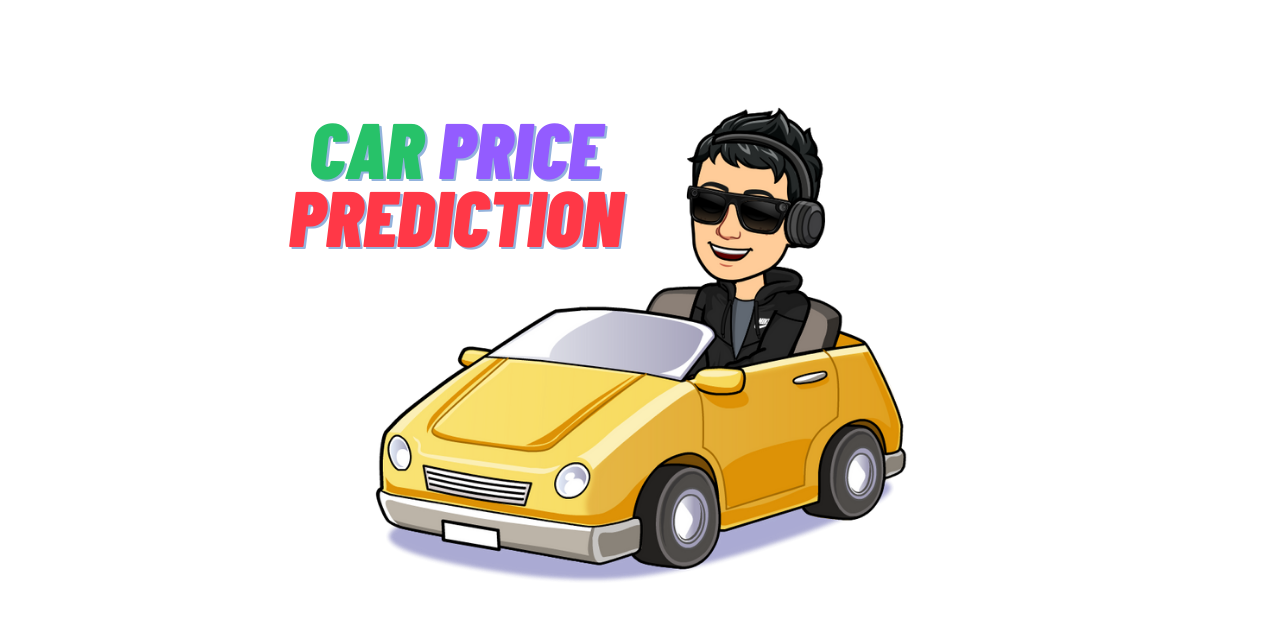
### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

## Importing the necessary libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from warnings import filterwarnings
filterwarnings('ignore')

## Exploring the dataset

In [2]:
d1= pd.read_csv('car data.csv')
d1.head()

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0

In [3]:
d1.shape

(301, 9)

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
d1.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
d1[d1.duplicated(keep=False)]

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
15       Dealer       Manual      0  
17       Dealer       Manual      0  
51       Dealer    Automatic      0  
93       Dealer    Automatic      0

In [7]:
duplicate_rows = d1[d1.duplicated(keep='last')]
duplicate_rows

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
15       Dealer       Manual      0  
51       Dealer    Automatic      0

## Cleaning the data

In [8]:
cleaned_data = d1.drop(duplicate_rows.index)
cleaned_data.to_csv('cleaned_data.csv')

In [9]:
cleaned_data.shape

(299, 9)

## Feature vs No_of_cars

In [10]:
no_of_cars_Car_Name = cleaned_data.groupby('Car_Name').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_Car_Name.head()

Car_Name  No_of_cars
0           city          26
1  corolla altis          16
2          verna          14
3           brio          10
4       fortuner          10

In [11]:
import plotly.express as px
fig = px.sunburst(no_of_cars_Car_Name,
                  path=['Car_Name'], values='No_of_cars',
                  color_continuous_scale='Plasma', title='No of cars for each Car_Name', height=950,
                 template='ggplot2',custom_data=['No_of_cars'])
fig.update_traces(textinfo='label+value', textfont_size=14)
fig.show()

In [12]:
no_of_cars_year = cleaned_data.groupby('Year').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_year

Year  No_of_cars
0   2015          60
1   2016          49
2   2014          38
3   2017          35
4   2013          33
5   2012          23
6   2011          19
7   2010          15
8   2008           7
9   2009           6
10  2005           4
11  2006           4
12  2003           2
13  2007           2
14  2004           1
15  2018           1

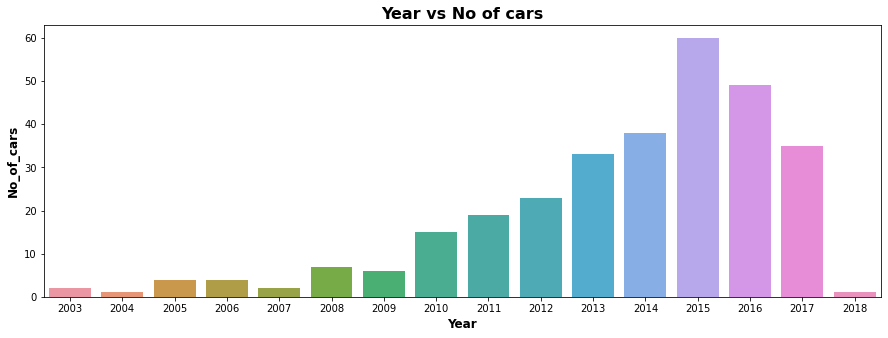

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='No_of_cars' , data = no_of_cars_year)
plt.title('Year vs No of cars', fontsize=16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('No_of_cars', fontsize=12, fontdict={'weight':'bold'})
plt.show()

In [14]:
no_of_cars_fuel = cleaned_data.groupby('Fuel_Type').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel

Fuel_Type  No_of_cars
0    Petrol         239
1    Diesel          58
2       CNG           2

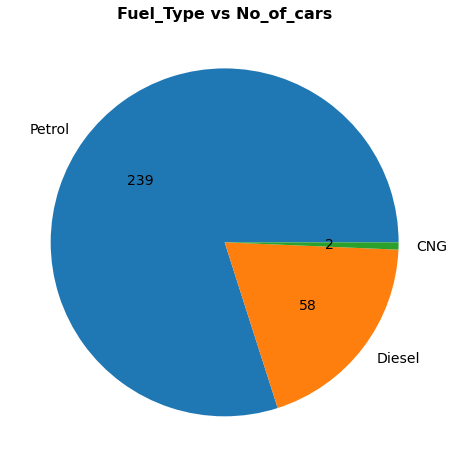

In [15]:
plt.figure(figsize=(8,8))
plt.pie(no_of_cars_fuel['No_of_cars'], autopct=lambda x: '{:.0f}'.format(x*no_of_cars_fuel['No_of_cars'].sum()/100), 
        labels = no_of_cars_fuel['Fuel_Type'], textprops={'fontsize': 14});
plt.title('Fuel_Type vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
plt.show()

In [16]:
no_of_cars_fuel_selling_type = cleaned_data.groupby('Selling_type').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel_selling_type

Selling_type  No_of_cars
0       Dealer         193
1   Individual         106

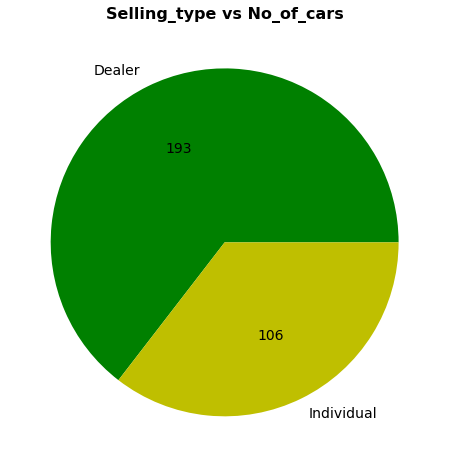

In [17]:
plt.figure(figsize=(8,8))
colors=['g','y']
plt.pie(no_of_cars_fuel_selling_type['No_of_cars'], autopct=lambda x: '{:.0f}'.format(x*no_of_cars_fuel['No_of_cars'].sum()/100), 
        labels = no_of_cars_fuel_selling_type['Selling_type'],colors=colors, textprops={'fontsize': 14});
plt.title('Selling_type vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
plt.show()

In [18]:
no_of_cars_fuel_transmission = cleaned_data.groupby('Transmission').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel_transmission

Transmission  No_of_cars
0       Manual         260
1    Automatic          39

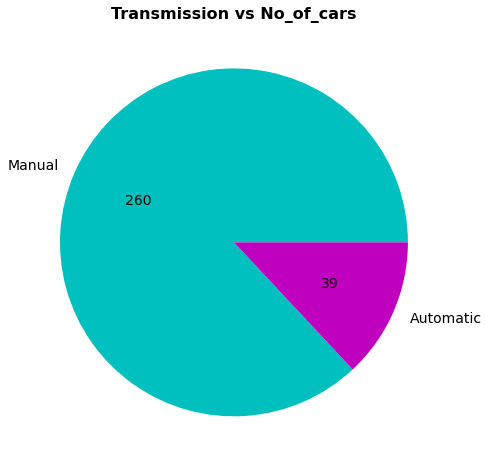

In [19]:
plt.figure(figsize=(8,8))
colors=['c','m']
plt.pie(no_of_cars_fuel_transmission['No_of_cars'], autopct=lambda x: '{:.0f}'.format(x*no_of_cars_fuel['No_of_cars'].sum()/100), 
        labels = no_of_cars_fuel_transmission['Transmission'],colors=colors, textprops={'fontsize': 14})
plt.title('Transmission vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
plt.show()

In [20]:
no_of_cars_fuel_Owner = cleaned_data.groupby('Owner').agg({'Car_Name':'count'}).rename(
    columns={'Car_Name':'No_of_cars'}).sort_values(by='No_of_cars',ascending=False).reset_index()
no_of_cars_fuel_Owner

Owner  No_of_cars
0      0         288
1      1          10
2      3           1

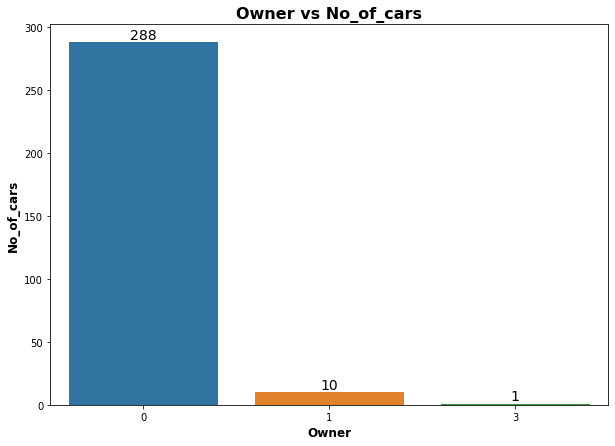

In [21]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='Owner', y='No_of_cars', data= no_of_cars_fuel_Owner)
plt.title('Owner vs No_of_cars', fontsize=16, fontdict={'weight': 'bold'})
ax.bar_label(ax.containers[0], fontsize=14)
plt.xlabel('Owner', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('No_of_cars', fontsize=12, fontdict={'weight':'bold'})
plt.show()

## Multi-Variate Analysis

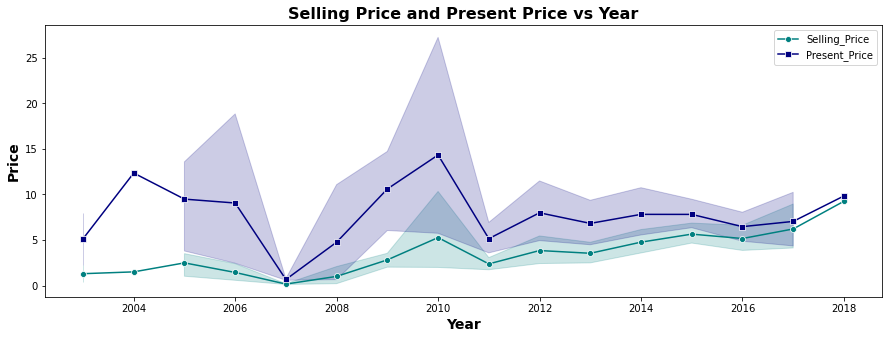

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot('Year', 'Selling_Price', color= 'teal',label= 'Selling_Price', marker='o', data = cleaned_data)
sns.lineplot('Year', 'Present_Price', color='navy', label='Present_Price', marker='s', data = cleaned_data)
plt.title('Selling Price and Present Price vs Year', fontsize = 16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=14, fontdict={'weight':'bold'})
plt.ylabel('Price', fontsize=14, fontdict={'weight':'bold'})
plt.show()

## Bi-variate Analysis

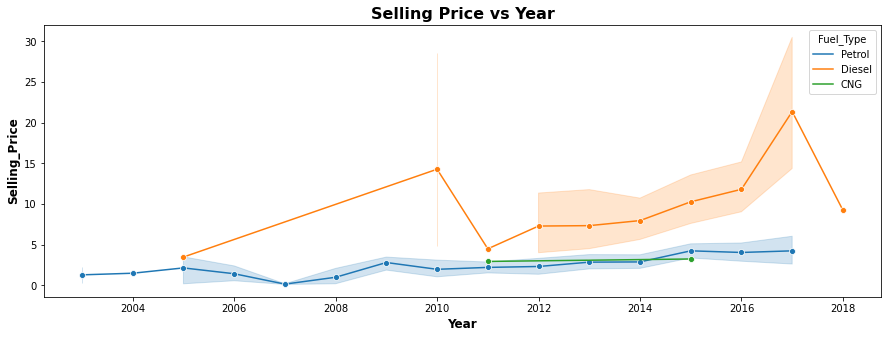

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot('Year', 'Selling_Price', hue= 'Fuel_Type', marker='o', data = cleaned_data)
plt.title('Selling Price vs Year', fontsize = 16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('Selling_Price', fontsize=12, fontdict={'weight':'bold'})
plt.show()

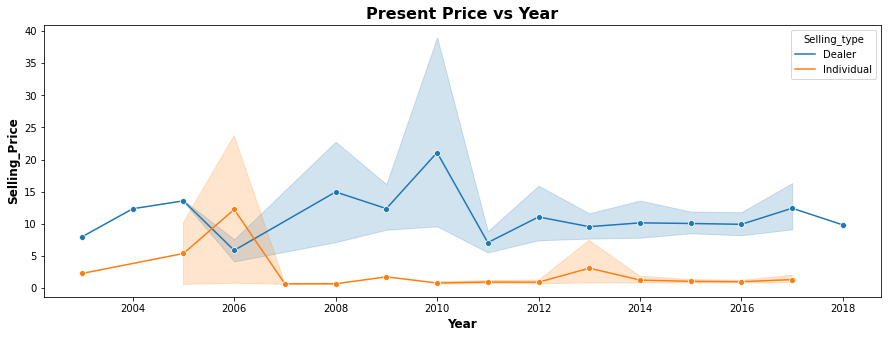

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot('Year', 'Present_Price', hue= 'Selling_type', marker='o', data = cleaned_data)
plt.title('Present Price vs Year', fontsize = 16, fontdict={'weight':'bold'})
plt.xlabel('Year', fontsize=12, fontdict={'weight':'bold'})
plt.ylabel('Selling_Price', fontsize=12, fontdict={'weight':'bold'})
plt.show()

## Data Transformation

In [25]:
transformed_data = cleaned_data.copy()

In [26]:
label_encoder= preprocessing.LabelEncoder()
transformed_data['Fuel_Type'] = label_encoder.fit_transform(transformed_data['Fuel_Type'])
transformed_data['Selling_type'] = label_encoder.fit_transform(transformed_data['Selling_type'])
transformed_data['Transmission'] = label_encoder.fit_transform(transformed_data['Transmission'])
transformed_data['Owner'] = label_encoder.fit_transform(transformed_data['Owner'])
transformed_data.head()

Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0

## Relationship between Features

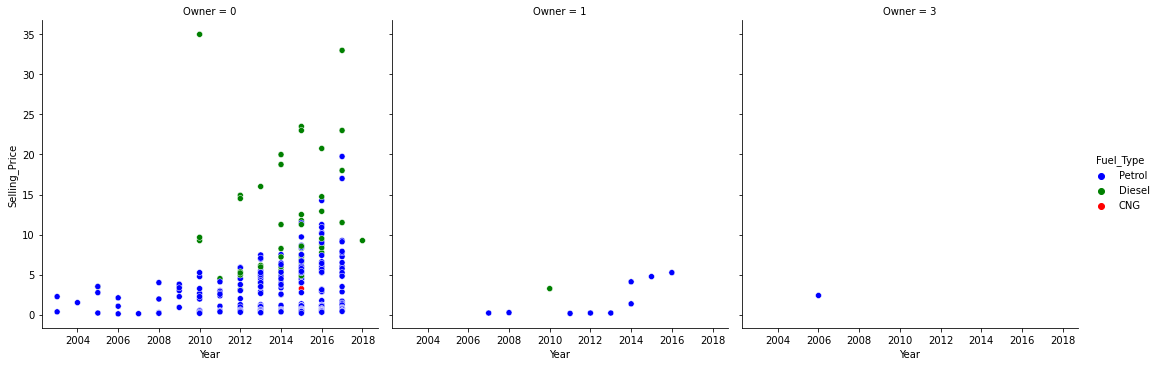

In [52]:
sns.relplot(x="Year", y="Selling_Price",hue= 'Fuel_Type',col ="Owner", data= cleaned_data, palette=['b','g','r'])

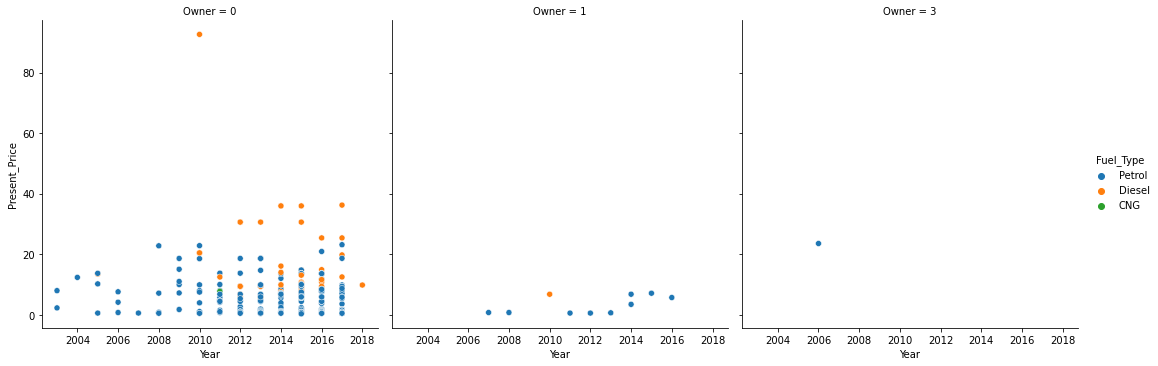

In [33]:
sns.relplot(x="Year", y="Present_Price",hue= 'Fuel_Type',col ="Owner", data= cleaned_data )

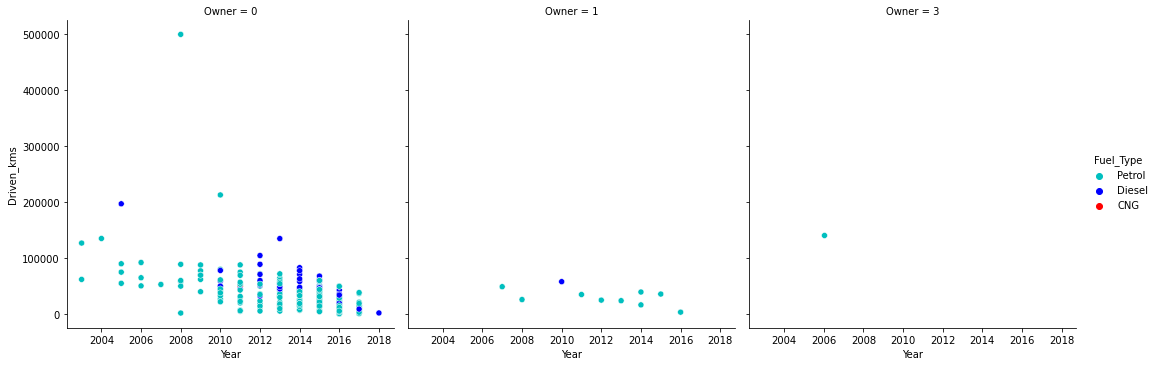

In [34]:
sns.relplot(x="Year", y="Driven_kms",hue= 'Fuel_Type',col ="Owner", data= cleaned_data, palette=['c', 'b','r'])

In [27]:
correlation = transformed_data.iloc[:,1:].corr()
correlation

Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
Year           1.000000       0.234369      -0.053167   -0.525714  -0.046210   
Selling_Price  0.234369       1.000000       0.876305    0.028566  -0.500292   
Present_Price -0.053167       0.876305       1.000000    0.205224  -0.431887   
Driven_kms    -0.525714       0.028566       0.205224    1.000000  -0.167287   
Fuel_Type     -0.046210      -0.500292      -0.431887   -0.167287   1.000000   
Selling_type  -0.036820      -0.553851      -0.511779   -0.101030   0.347922   
Transmission   0.003434      -0.348869      -0.334326   -0.163881   0.068618   
Owner         -0.170694      -0.096019      -0.018158    0.061924   0.055526   

               Selling_type  Transmission     Owner  
Year              -0.036820      0.003434 -0.170694  
Selling_Price     -0.553851     -0.348869 -0.096019  
Present_Price     -0.511779     -0.334326 -0.018158  
Driven_kms        -0.101030     -0.163881  0.061924  
Fuel_Type          0.347922      0.068618  0.055526  
Selling_type       1.000000      0.058669  0.123165  
Transmission       0.058669      1.000000 -0.020306  
Owner              0.123165     -0.020306  1.000000

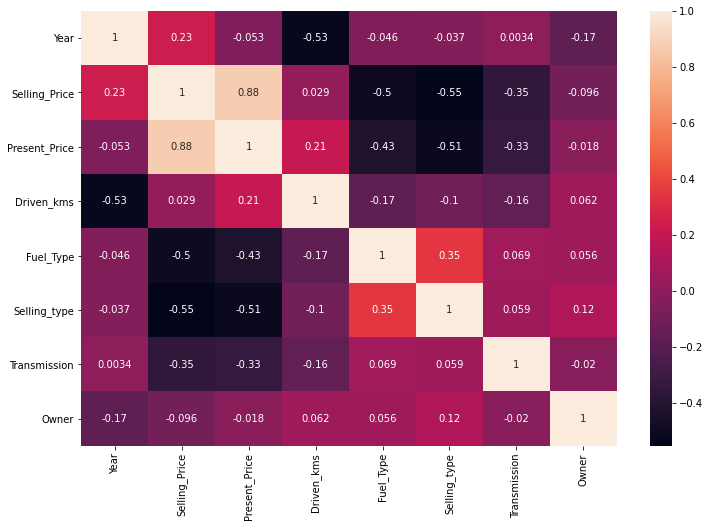

In [28]:
sns.heatmap(correlation, annot= True)
plt.gcf().set_size_inches(12, 8)

### From the above correlation plot we can infer the following :-
#### A -> Selling_Price is influenced by :
#### (i) Present_price by a score of 0.88
#### (ii) Fuel_Type by a score of 0.5
#### (iii) Selling_type by a score of 0.55
#### (iv) Transmission_type by a score of 0.35
#### B -> Present_Price is influenced by :
#### (i) Selling_price by a score of 0.88
#### (ii) Fuel_Type by a score of 0.43
#### (iii) Selling_type by a score of 0.51
#### (iv) Transmission_type by a score of 0.33

## Histogram Distribution

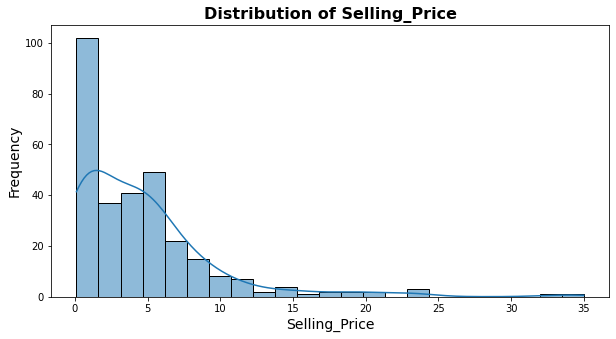

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(transformed_data['Selling_Price'],kde=True)
plt.xlabel('Selling_Price', fontsize= 14 )
plt.ylabel('Frequency',fontsize= 14)
plt.title('Distribution of Selling_Price', fontsize= 16, fontdict={'weight':'bold'})
plt.show()

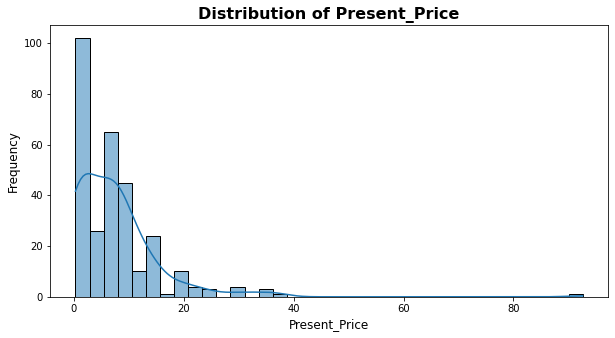

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(transformed_data['Present_Price'],kde=True)
plt.xlabel('Present_Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Present_Price', fontsize= 16, fontdict={'weight':'bold'})
plt.show()

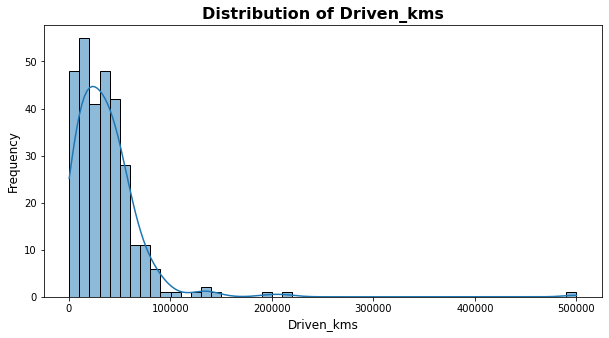

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(transformed_data['Driven_kms'],kde=True)
plt.xlabel('Driven_kms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Driven_kms', fontsize= 16, fontdict={'weight':'bold'})
plt.show()

### Preparing the data for training and testing of model

In [35]:
x= transformed_data.drop(['Car_Name', 'Selling_Price'],axis=1)
y = transformed_data['Selling_Price']
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size= 0.2,random_state=0)

### Training the data using Linear Regression

In [36]:
model_1=LinearRegression().fit(x,y)

### Evaluating the performance using Linear Regression

In [37]:
y_pred1= model_1.predict(x_test)
y_pred1

array([ 6.37128076e+00, -2.03513120e+00,  7.62103464e+00,  5.31388164e+00,
        2.59443817e+00,  1.54842534e+00,  6.52707605e+00,  5.62949313e+00,
        7.32027820e-01,  2.00506479e+00,  4.53535881e+00,  7.97398139e+00,
        2.33469473e-01,  3.03747859e+00,  2.84754805e+00,  7.22452339e+00,
        3.54865239e+00,  3.51992206e+00,  4.92547717e+00,  7.75648269e+00,
       -2.84589801e+00,  1.76198345e+00,  2.07467935e+00,  1.10118418e+00,
        5.93940794e+00,  1.33864928e+00, -3.51873913e+00,  6.36670977e+00,
        8.78521472e+00,  5.21061104e+00,  9.98126729e+00,  5.89812353e+00,
        7.67442955e+00,  3.31031383e-01,  4.71063310e+00, -1.33488740e-02,
        1.87890311e+00, -2.29774802e+00,  4.98186391e+00,  9.01436717e+00,
        6.52666137e+00,  9.80268802e+00,  9.17405771e+00,  6.41582426e+00,
        7.84178726e+00,  1.48681581e+00,  4.29434252e+00,  1.42847027e+01,
        7.06332045e+00,  2.95306741e+00,  4.78428111e+00,  4.10534123e+00,
       -8.90790959e-01,  

In [38]:
mse_1= mean_squared_error(y_test, y_pred1)
r2_1  = r2_score(y_test, y_pred1)
print('Mean Squared Error: ', mse_1)
print('R2 Squared: ', r2_1)

Mean Squared Error:  3.0253636862823132
R2 Squared:  0.7845519065133921


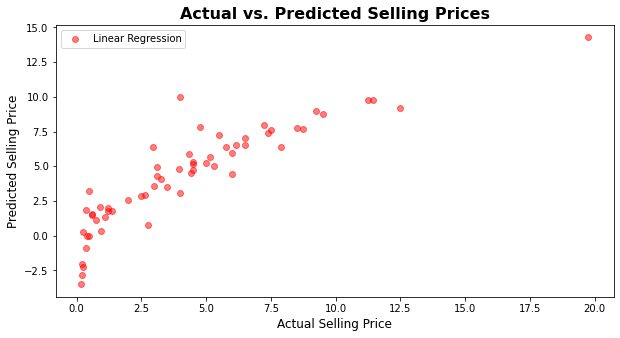

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred1, color='red', label ='Linear Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs. Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

### Training the data using Random Forest Regression

In [40]:
model_2=RandomForestRegressor().fit(x,y)

### Evaluating the performance using Random Forest Regression

In [41]:
y_pred2= model_2.predict(x_test)
y_pred2

array([ 7.395 ,  0.1962,  7.3824,  4.24  ,  2.311 ,  0.623 ,  5.8413,
        4.847 ,  2.7444,  1.161 ,  4.369 ,  7.2965,  0.25  ,  3.5545,
        2.226 ,  5.879 ,  3.0936,  3.5595,  3.2675,  8.892 ,  0.1961,
        1.2691,  0.8516,  0.6798,  5.6675,  1.0939,  0.1724,  5.4   ,
        9.1544,  5.1995,  4.4301,  4.5751,  8.0765,  1.0215,  4.5399,
        0.4917,  0.3472,  0.2508,  5.329 ,  8.7835,  6.966 , 10.0235,
       11.672 ,  3.0975,  5.2461,  0.6148,  3.044 , 18.5201,  6.5525,
        2.902 ,  4.1015,  3.5176,  0.3678,  1.1824,  4.8646, 11.0049,
        0.451 ,  5.7165,  7.1095,  0.4581])

In [42]:
mse_2= mean_squared_error(y_test, y_pred2)
r2_2  = r2_score(y_test, y_pred2)
print('Mean Squared Error: ', mse_2)
print('R2 Squared: ', r2_2)

Mean Squared Error:  0.1234564118333336
R2 Squared:  0.9912081814564005


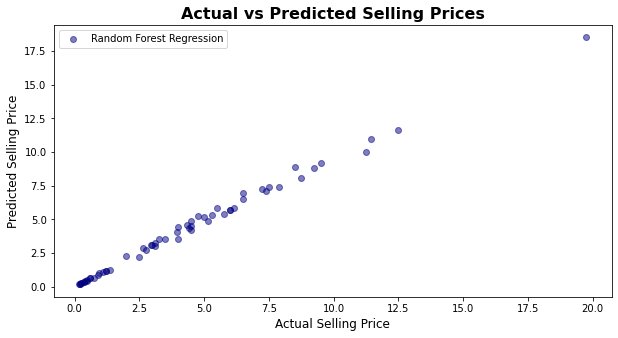

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred2, color='navy', label ='Random Forest Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

### Training the data using XGBoost Regressor

In [44]:
model_3=xg.XGBRegressor().fit(x,y)

### Evaluating the performance using XGBoost Regressor

In [45]:
y_pred3= model_3.predict(x_test)
y_pred3

array([ 7.894911  ,  0.19942814,  7.506301  ,  4.505491  ,  2.0268724 ,
        0.62508357,  6.0974817 ,  5.1458597 ,  2.7519753 ,  1.2272029 ,
        4.357245  ,  7.264093  ,  0.25478217,  3.9358594 ,  2.4961772 ,
        5.5017443 ,  3.018175  ,  3.508206  ,  3.1486619 ,  8.479574  ,
        0.20068538,  1.3326185 ,  0.8682835 ,  0.7458446 ,  5.9672866 ,
        1.115035  ,  0.17043726,  5.7364297 ,  9.50251   ,  5.0191145 ,
        3.99542   ,  4.3605075 ,  8.725806  ,  0.951818  ,  4.4789915 ,
        0.49413985,  0.35151154,  0.24947435,  5.321918  ,  9.246003  ,
        6.5050473 , 11.237947  , 12.466118  ,  2.9552686 ,  4.7632985 ,
        0.60693735,  3.0809429 , 19.746498  ,  6.495162  ,  2.6547012 ,
        3.940555  ,  3.250069  ,  0.37782413,  1.188965  ,  4.5188026 ,
       11.438091  ,  0.41785678,  6.0110917 ,  7.405799  ,  0.47955006],
      dtype=float32)

In [46]:
mse_3= mean_squared_error(y_test, y_pred3)
r2_3  = r2_score(y_test, y_pred3)
print('Mean Squared Error: ', mse_3)
print('R2 Squared: ', r2_3)

Mean Squared Error:  0.00037197277339541627
R2 Squared:  0.9999735103501043


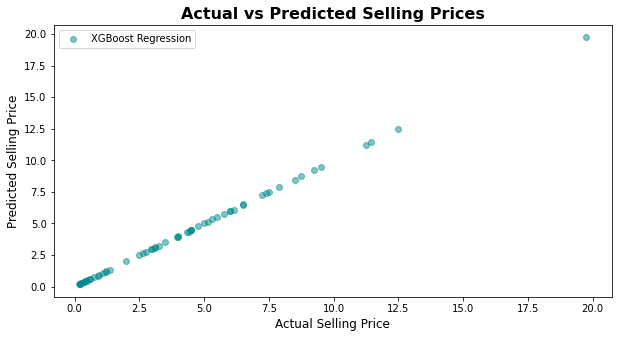

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred3, color='darkcyan', label ='XGBoost Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize=12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

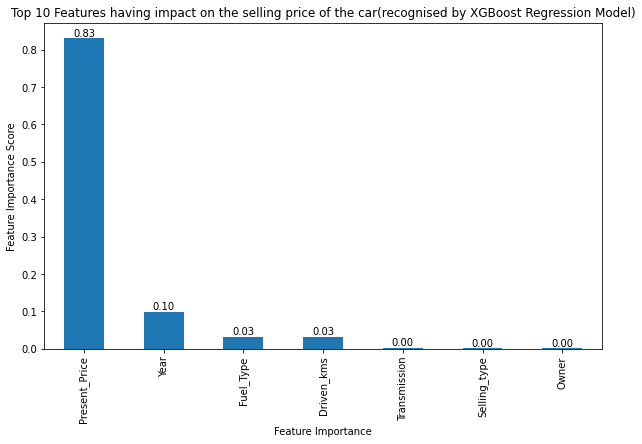

In [48]:
feature_importances = pd.Series(model_3.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
top_10_features = feature_importances.nlargest(10)
feature_importances.nlargest(10).plot(kind='bar')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Importance Score')
plt.title('Top 10 Features having impact on the selling price of the car(recognised by XGBoost Regression Model)')
for index, value in enumerate(top_10_features):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
feature_importances.to_csv('feature_importances.csv')
plt.show()

In [49]:
predicted_data=pd.DataFrame({'Actual Selling_Price': y_test, 'Predicted Selling_Price': y_pred3})
predicted_data.to_csv('predicted_data.csv', index=False)